# Data Exploration

In [1]:
%cd ..

C:\Users\ganiy\OneDrive\Documents\IMDB-TV


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(style = "dark")
%matplotlib inline
import matplotlib.pyplot as plt

### Loading data sets

In [3]:
imdb_data = pd.read_csv("cumulative-data/tv_dataset.csv")
top_episodes = pd.read_csv("cumulative-data/top1000_episodes_imdb.csv")
top_250 = pd.read_csv("cumulative-data/IMDb_top_250.csv")

In [4]:
imdb_data.head()

,tv,season,episode_number,title,airdate,rating,total_votes,desc,encoded_title
0,Luther,1,0,Inside Look,"May 4, 2010",8.0,781,"Series creator and writer Neil Cross, and Luth...",tt1474684
1,Luther,1,1,Episode #1.1,"Oct 17, 2010",8.2,3323,Luther returns to work after a traumatic arres...,tt1474684
2,Luther,1,2,Episode #1.2,"Oct 24, 2010",8.2,2879,A gunman is murdering uniformed police officer...,tt1474684
3,Luther,1,3,Episode #1.3,"Oct 31, 2010",8.0,2676,John Luther is on the trail of a satanic occul...,tt1474684
4,Luther,1,4,Episode #1.4,"Nov 7, 2010",8.5,2759,"When a serial killer goes on the rampage, Luth...",tt1474684


In [5]:
top_episodes.head()

,tv_show,episode,rating,year,total_votes,desc,genre,encoded_title,genre1,genre2,genre3
0,Attack on Titan,Hero,9.9,2019,83546,As Erwin's heroic charge buys Levi time to con...,"Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
1,Attack on Titan,Perfect Game,9.9,2019,44994,"While one front is rained on by flames, the ot...","Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
2,Mr. Robot,407 Proxy Authentication Required,9.9,2019,26074,Vera holds Krista hostage as he tries to force...,"Crime, Drama, Thriller",tt4158110,Crime,Drama,Thriller
3,Attack on Titan,Senshi,9.9,2017,27872,"Following the battle, the Scouts regroup atop ...","Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
4,Game of Thrones,The Winds of Winter,9.9,2016,142118,Cersei and Loras Tyrell stand trial by the god...,"Action, Adventure, Drama",tt0944947,Action,Adventure,Drama


In [6]:
top_250.head()

,title,rating,total_votes,description,year,link,encoded_title
0,Planet Earth II,9.5,110000,David Attenborough returns with a new wildlife...,2016,https://www.imdb.com/title/tt5491994,tt5491994
1,Planet Earth,9.4,178000,"Emmy Award-winning, 11 episodes, five years in...",2006,https://www.imdb.com/title/tt0795176,tt0795176
2,Breaking Bad,9.4,1700000,A high school chemistry teacher diagnosed with...,2008,https://www.imdb.com/title/tt0903747,tt0903747
3,Band of Brothers,9.4,414000,The story of Easy Company of the U.S. Army 101...,2001,https://www.imdb.com/title/tt0185906,tt0185906
4,Chernobyl,9.3,650000,"In April 1986, an explosion at the Chernobyl n...",2019,https://www.imdb.com/title/tt7366338,tt7366338


### Top 20 shows by ratings and votes

In [7]:
top_20_ratings = top_250.loc[:20, ["title", "rating"]]

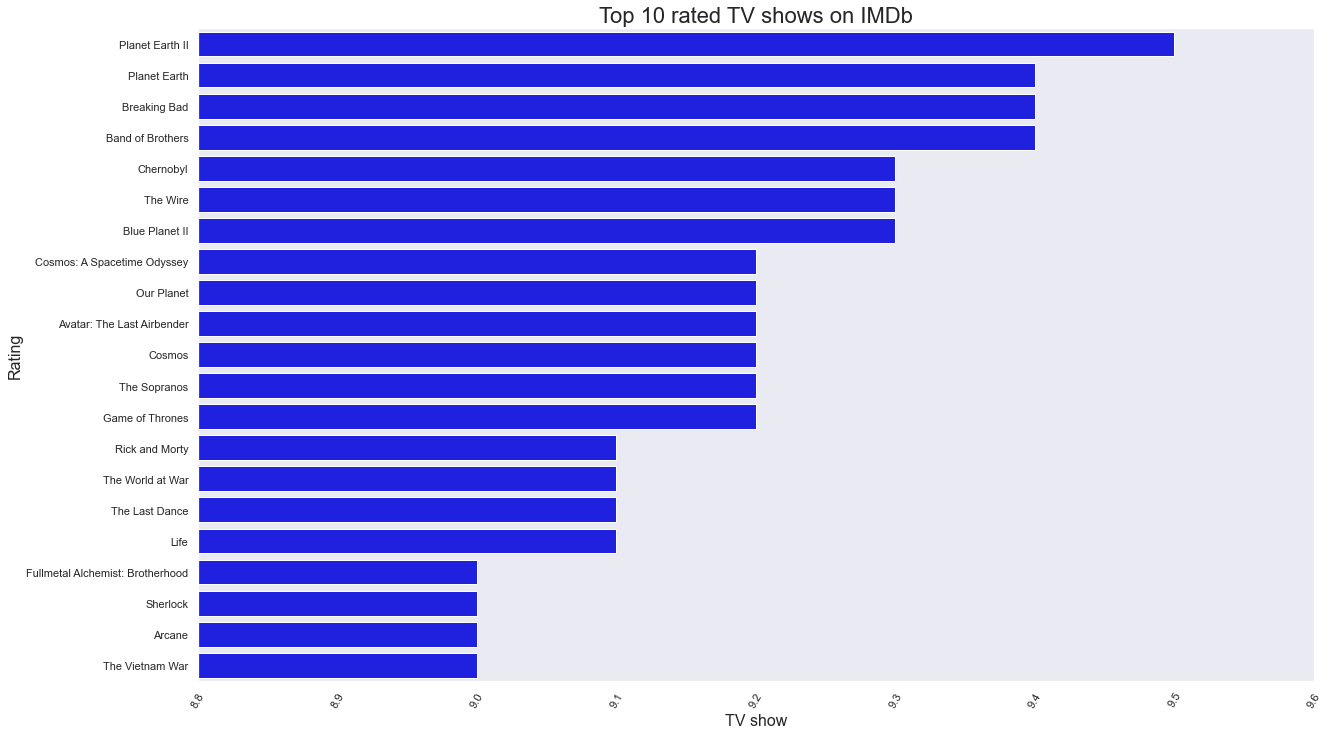

In [36]:
plt.figure(figsize = (20,12))
sns.barplot(y = "title", x = "rating", data = top_20_ratings, color = "blue")
plt.title("Top 10 rated TV shows on IMDb", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Rating", fontsize = 16)
plt.xticks(rotation = 60)
plt.xlim(8.8,9.6)
plt.show();

In [9]:
top_votes = top_250.sort_values("total_votes", ascending = False).reset_index(drop=True)
top_20_votes = top_votes.loc[:20, ["title", "total_votes"]]

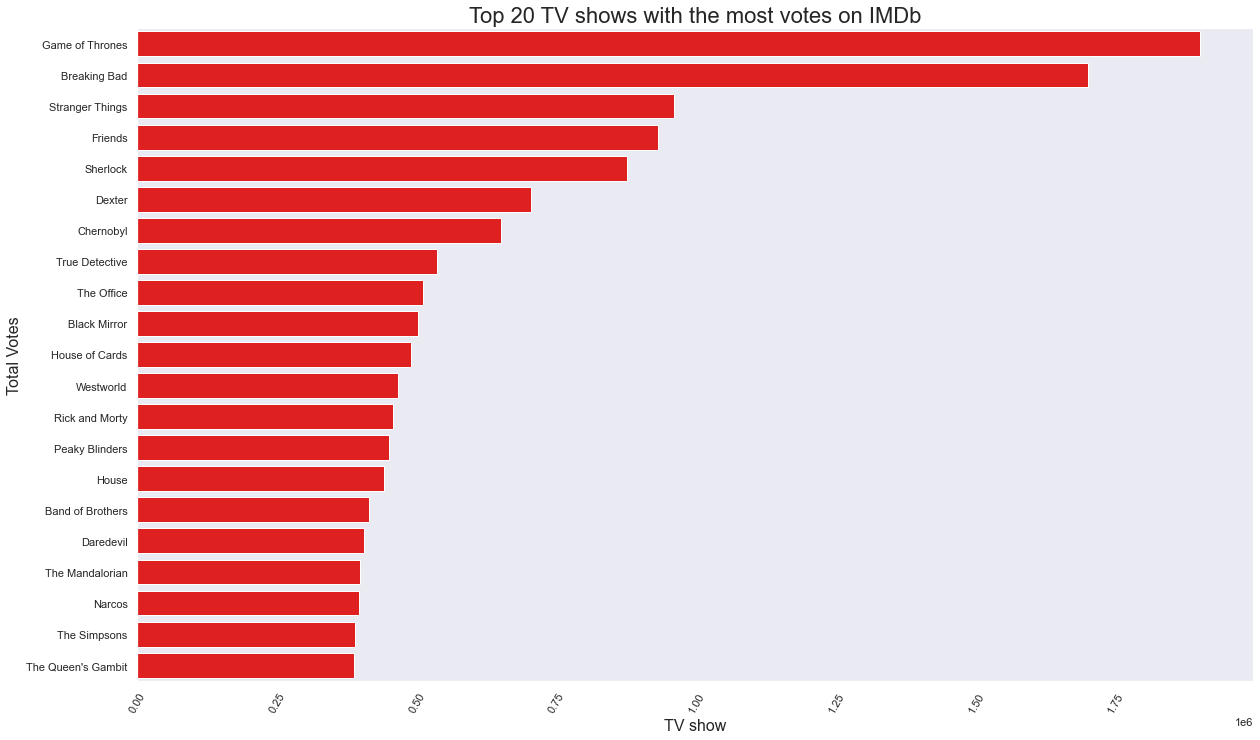

In [33]:
plt.figure(figsize = (20,12))
sns.barplot(y = "title", x = "total_votes", data = top_20_votes, color = "red")
plt.title("Top 20 TV shows with the most votes on IMDb", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Total Votes", fontsize = 16)
plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Top 20 shows by ratings and votes - Aggregation by episode

In [11]:
mean_ratings = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["rating"].mean()

In [12]:
mean_ratings_sorted = mean_ratings.sort_values("rating", ascending = False).reset_index(drop =True)

In [13]:
top20_mean_ratings = mean_ratings_sorted.loc[:20, ["tv", "rating"]]

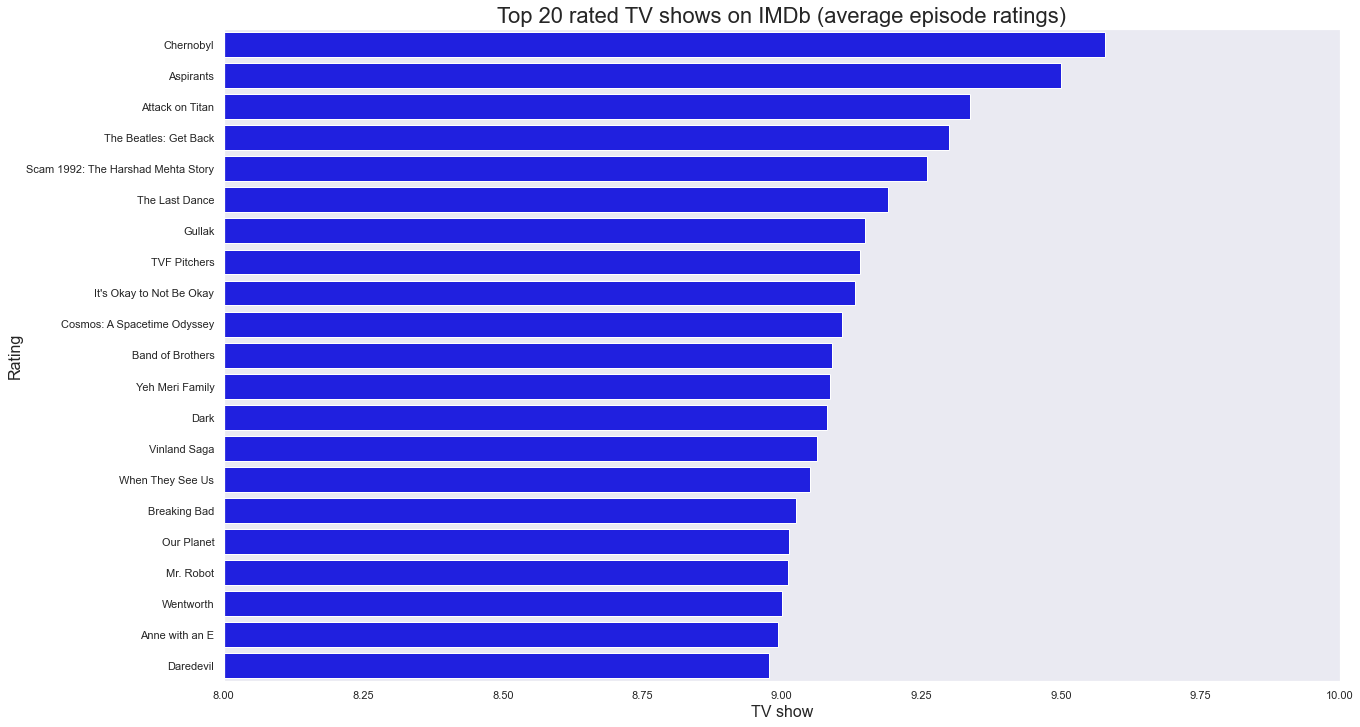

In [31]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "rating", data = top20_mean_ratings, color = "blue")
plt.title("Top 20 rated TV shows on IMDb (average episode ratings)", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Rating", fontsize = 16)
#plt.xticks(rotation = 60)
plt.xlim(8,10)
plt.show();

In [25]:
sum_votes = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["total_votes"].mean()
sum_votes_sorted = sum_votes.sort_values("total_votes", ascending = False).reset_index(drop = True)
top20_total_votes = sum_votes_sorted.loc[:20, ["tv", "total_votes"]]

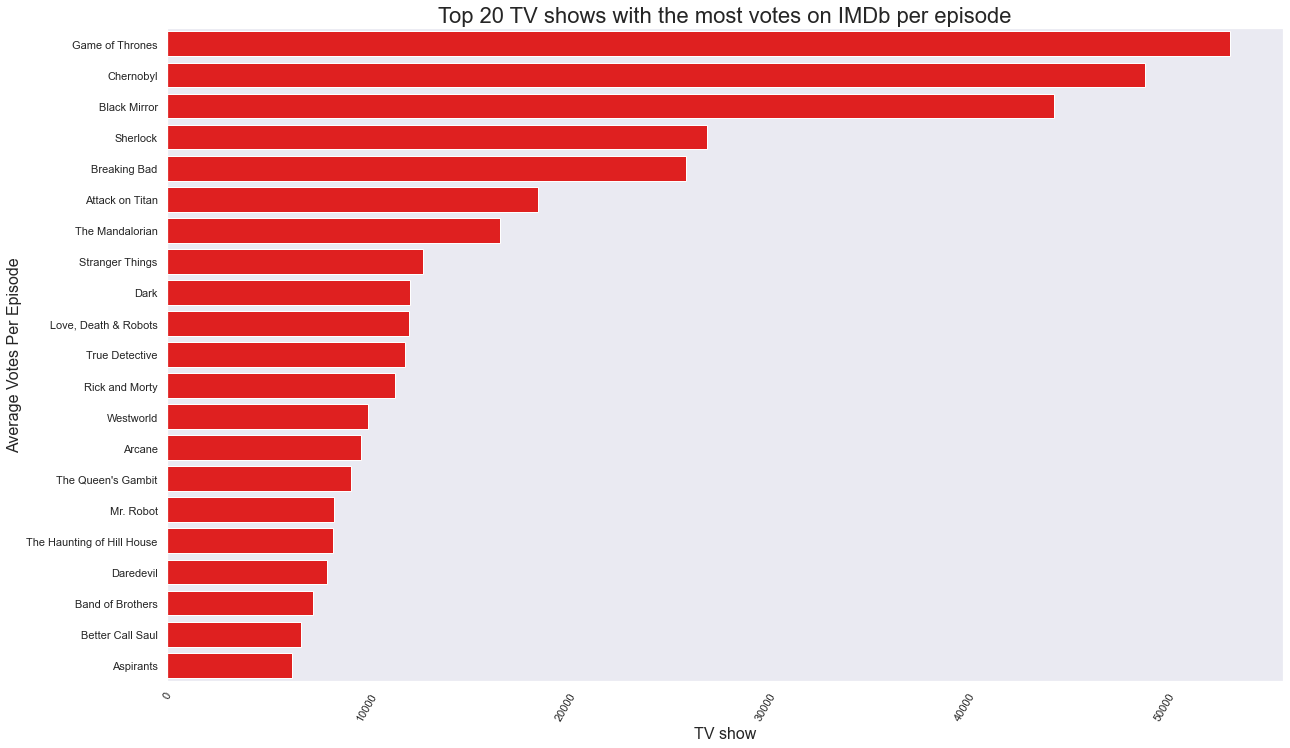

In [37]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "total_votes", data = top20_total_votes, color = "red")
plt.title("Top 20 TV shows with the most votes on IMDb per episode", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Average Votes Per Episode", fontsize = 16)
plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();